In [1]:
import numpy as np
import mylibrary.nnlib as nn

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

### OR Gate

(200, 2) (200, 1)


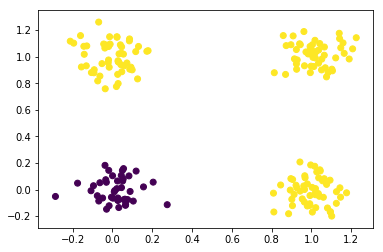

In [2]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[T]])

x = []
y = []
n_data = 200
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.normal(loc=0., scale=0.1, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

## Classical gradient descent method of logistic regression

In [3]:
optimizer = nn.Adam(learning_rate=0.1)
log1 = nn.NonLinearLayer(2 ,1, activation=nn.Sigmoid(), optimizer=optimizer)

_______________________
epoch 0
Loss 0.5741801481938588


_______________________
epoch 10
Loss 0.1311120992678234


_______________________
epoch 20
Loss 0.09913181026274338


_______________________
epoch 30
Loss 0.12601933936520182


_______________________
epoch 40
Loss 0.12897585925904728


_______________________
epoch 50
Loss 0.09737994460566853


_______________________
epoch 60
Loss 0.07610958026233589


_______________________
epoch 70
Loss 0.06817712666140484


_______________________
epoch 80
Loss 0.06386963133219582


_______________________
epoch 90
Loss 0.05888769989186136


_______________________
epoch 100
Loss 0.05373259004954243


_______________________
epoch 110
Loss 0.04948109060512257


_______________________
epoch 120
Loss 0.046214273422587195


_______________________
epoch 130
Loss 0.04355011770665548


_______________________
epoch 140
Loss 0.04119741894859124


_______________________
epoch 150
Loss 0.039057476944807906


_______________________
epoch 160
L

TclError: this isn't a Tk application

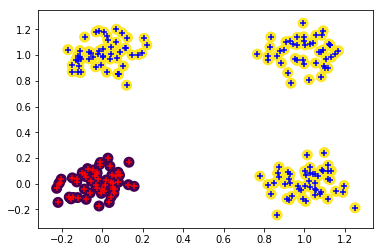

In [4]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

colors = ['r', 'y', 'g', 'b']

for step in range(10000):
    a1 = log1.forward(x)
    loss = nn.CrossEntropyLoss.loss(a1, y)
    dy = nn.CrossEntropyLoss.del_loss(a1, y)
    
    dx = log1.backward(dy)
    log1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        
        out = (a1>0.5).astype(int)

        ax.clear()
        plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
        plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))
        
        

        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

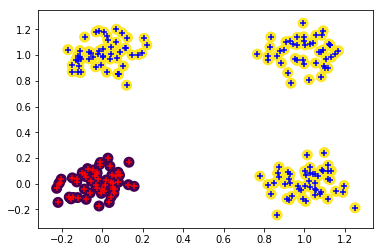

In [5]:
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors)) 

## Analytical solution to logistic regression

In [14]:
h = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]

In [15]:
optimizer = nn.SGD(learning_rate=1)
log2 = nn.NonLinearLayer(2 ,1, activation=nn.Sigmoid(), optimizer=optimizer)

0.8818568371746411


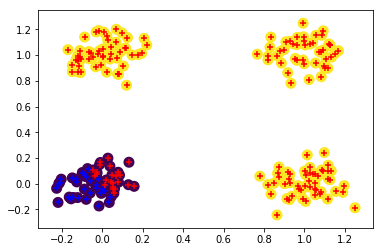

In [16]:
a2 = log2.forward(x)
loss = nn.CrossEntropyBinary.loss(a2, y)
dy = nn.CrossEntropyBinary.del_loss(a2, y)
print(loss)

out = (a2>0.5).astype(int)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

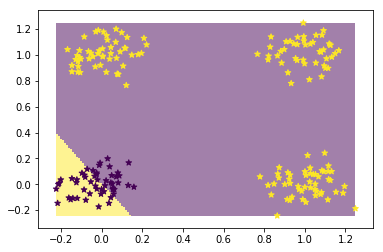

In [18]:
classxy = log2.forward(xxyy)
classxyi = (classxy > 0.5).astype(int)

# advanced way of showing
plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=matplotlib.colors.ListedColormap(colors[2:]),
           alpha=0.5,
           aspect='auto', origin='lower')
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')

In [20]:
# recursively finding gradient to fit the data
a2 = log2.forward(x)
dz_ = np.copy(log2.del_zee)
z_ = np.copy(log2.zee)

sigmoid = nn.Sigmoid()
for i in range(50):
    a2_ = sigmoid.forward(z_)
    dy_ = nn.CrossEntropyLoss.del_loss(a2_, y)
    dz_ = sigmoid.backward(dy_)
    z_ = z_ - dz_

In [22]:
a2_ = sigmoid.forward(z_)
loss_ = nn.CrossEntropyBinary.loss(a2_, y)
dy_ = nn.CrossEntropyBinary.del_loss(a2_, y)
print(loss, loss_)

0.8818568371746411 0.13356686682587124


In [25]:
# z_ = x . w
# w = pinv(x) . z_
xwb = np.c_[x, np.ones(len(x))]
wb = np.linalg.pinv(xwb) @ z_
wb

array([[ 1.92877693],
       [ 1.89504636],
       [-0.95104051]])

In [32]:
wr = wb[:2, :]
br = wb[2]
z2_ = x@wr + br
a2_ = sigmoid.forward(z2_)
print(nn.CrossEntropyBinary.loss(a2_, y))

0.2623473165318299


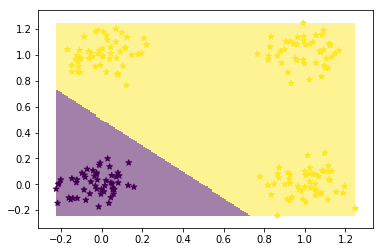

In [33]:
z2_ = xxyy@wr + br
classxy = sigmoid.forward(z2_)
classxyi = (classxy > 0.5).astype(int)

# advanced way of showing
plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=matplotlib.colors.ListedColormap(colors[2:]),
           alpha=0.5,
           aspect='auto', origin='lower')
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')

(-0.24350058481519318, 1.2497180212905759)

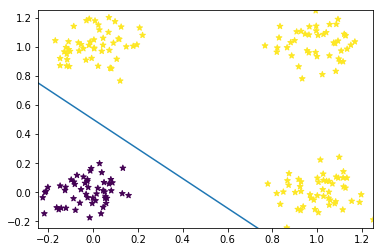

In [54]:
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')
x0pt = np.array([x.min(), x.max()])
x1pt = -(x0pt * wr[0][0] + br)/wr[1][0]
plt.plot(x0pt, x1pt)
plt.xlim(x.min(), x.max())
plt.ylim(x.min(), x.max())

In [56]:
# using inverse function to compute everything backwards

In [57]:
def logit(x, epsilon = 1e-3):
    x = x.clip(min = epsilon, max=1-epsilon)
    return np.log(x / (1-x))

In [60]:
ztarg = logit(y)
xwb = np.c_[x, np.ones(len(x))]
wb = np.linalg.pinv(xwb) @ ztarg
wr = wb[:2, :]
br = wb[2]
wr, br

(array([[6.87960144],
        [6.70043352]]), array([-3.31966538]))

In [61]:
z2_ = x@wr + br
a2_ = sigmoid.forward(z2_)
print(nn.CrossEntropyBinary.loss(a2_, y))

0.03444231650739061


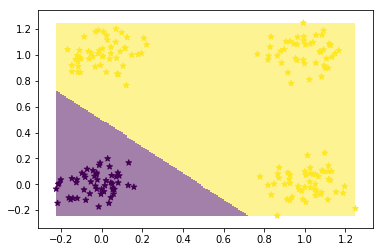

In [62]:
z2_ = xxyy@wr + br
classxy = sigmoid.forward(z2_)
classxyi = (classxy > 0.5).astype(int)

plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           alpha=0.5,
           aspect='auto', origin='lower')
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')